### EDA on Home Loan Dataset

### Phase One: Data collection and preparation

In [547]:
# import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

**Task 1.1: Load the Home dataset into a Pandas DataFrame**

In [548]:
# Data injestion of the train dataset
loan_train_data = pd.read_csv('home_loan_train.csv')
print("First two rows of the dataset\n")
loan_train_data.head(2)

First two rows of the dataset



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


**Task 1.2: Inspect the dataset for missing values, duplicates, and data type inconsistencies.**

In [549]:
# Checking for duplicates

print(f"Total number of duplicated values \n {loan_train_data.duplicated().sum()}")

Total number of duplicated values 
 0


In [550]:
# Checking for inconsistencies in the dataset
loan_train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [551]:
# Printing the columns in the dataset
loan_train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [552]:
# Check the basic information of the dataset
loan_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [553]:
# Checking for missing values
loan_train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [554]:
# Checking the shape of the dataset
loan_train_data.shape

(614, 13)

In [555]:
# Setting the loan ID as the ID
loan_train_data.set_index("Loan_ID", inplace=True)

In [556]:
# Display the output
loan_train_data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


**Task 1.3: Clean the dataset by handling missing values, correcting data types, and addressing outliers.**

**Handling the categorical missing data**

In [557]:
# Making a copy of our dataset
df_train = loan_train_data.copy()

In [558]:
df_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [559]:
# Convert the Credit hstory to a string
df_train['Credit_History'] = df_train['Credit_History'].astype(str)

In [562]:
# 
df_train['Credit_History']

Loan_ID
LP001002    good
LP001003    good
LP001005    good
LP001006    good
LP001008    good
            ... 
LP002978    good
LP002979    good
LP002983    good
LP002984    good
LP002990     bad
Name: Credit_History, Length: 614, dtype: object

In [561]:
df_train['Credit_History'] = df_train['Credit_History'].map({'1.0': 'good', '0.0': 'bad'})

In [563]:
# Convert the Loan_Amount_Term to a string
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].astype(str)

In [564]:
# Extract the columns with categorical variables
cat_col = df_train.select_dtypes(include="object").columns


In [565]:
# get the mode of the columns
modes = df_train[cat_col].apply(lambda x: x.value_counts().index[0])

# fill the missing values in the catgorical columns with modes
df_train[cat_col] = df_train[cat_col].fillna(modes)


# rechecck the missing values
df_train[cat_col].isna().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64

In [503]:
# # Filling the the missing categorical dataset with the mode from each column
# for col in cat_col:
#     missing_cat_values_mode = df_train[col].index[0]
#     df_train[col].fillna(missing_cat_values_mode)
#     print(f"Fill the missing dataset in the {col} with the value of the {missing_cat_values_mode}")


In [566]:
# Checking the categorical columns for the distribution
for col in cat_col:
    print(col)
    print(df_train[col].value_counts())

Gender
Gender
Male      502
Female    112
Name: count, dtype: int64
Married
Married
Yes    401
No     213
Name: count, dtype: int64
Dependents
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
Loan_Amount_Term
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
nan       14
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
Credit_History
Credit_History
good    525
bad      89
Name: count, dtype: int64
Property_Area
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Loan_Status
Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [505]:

# #Fill categorical columns with most frquent values
# for col in cat_col:
#     missing_cat_values_mode = df_train[col].value_counts().index[0]
#     df_train[col] = df_train[col].fillna(missing_cat_values_mode)

**Handling missing data in the numerical columns**

In [567]:
# Extract the columns with categorical variables
num_col = df_train.select_dtypes(include=["int64","Float64"]).columns
num_col

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')

In [568]:
# Filling the the missing numerical dataset with the mode from each column
for col in num_col:
    missing_num_values_mode = df_train[col].median()
    df_train[col].fillna(missing_num_values_mode, inplace=True)
    print(f"Fill the missing dataset in the {col} with the value of the {missing_num_values_mode}")

Fill the missing dataset in the ApplicantIncome with the value of the 3812.5
Fill the missing dataset in the CoapplicantIncome with the value of the 1188.5
Fill the missing dataset in the LoanAmount with the value of the 128.0


C:\Users\kanyi\AppData\Local\Temp\ipykernel_16964\4093550028.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(missing_num_values_mode, inplace=True)
C:\Users\kanyi\AppData\Local\Temp\ipykernel_16964\4093550028.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [569]:
# Confirm the missing cat columns
df_train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [570]:
# Checking the distribution of the numerical columns
for col in num_col:
    print(col)
    print(df_train[col].sum())

ApplicantIncome
3317724
CoapplicantIncome
995444.9199886399
LoanAmount
89492.0


**Locating Outliers**

In [571]:
# Selecting the numerical columns
num_cols = df_train.select_dtypes(include=["int64", "float64"]).columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')

<Axes: ylabel='LoanAmount'>

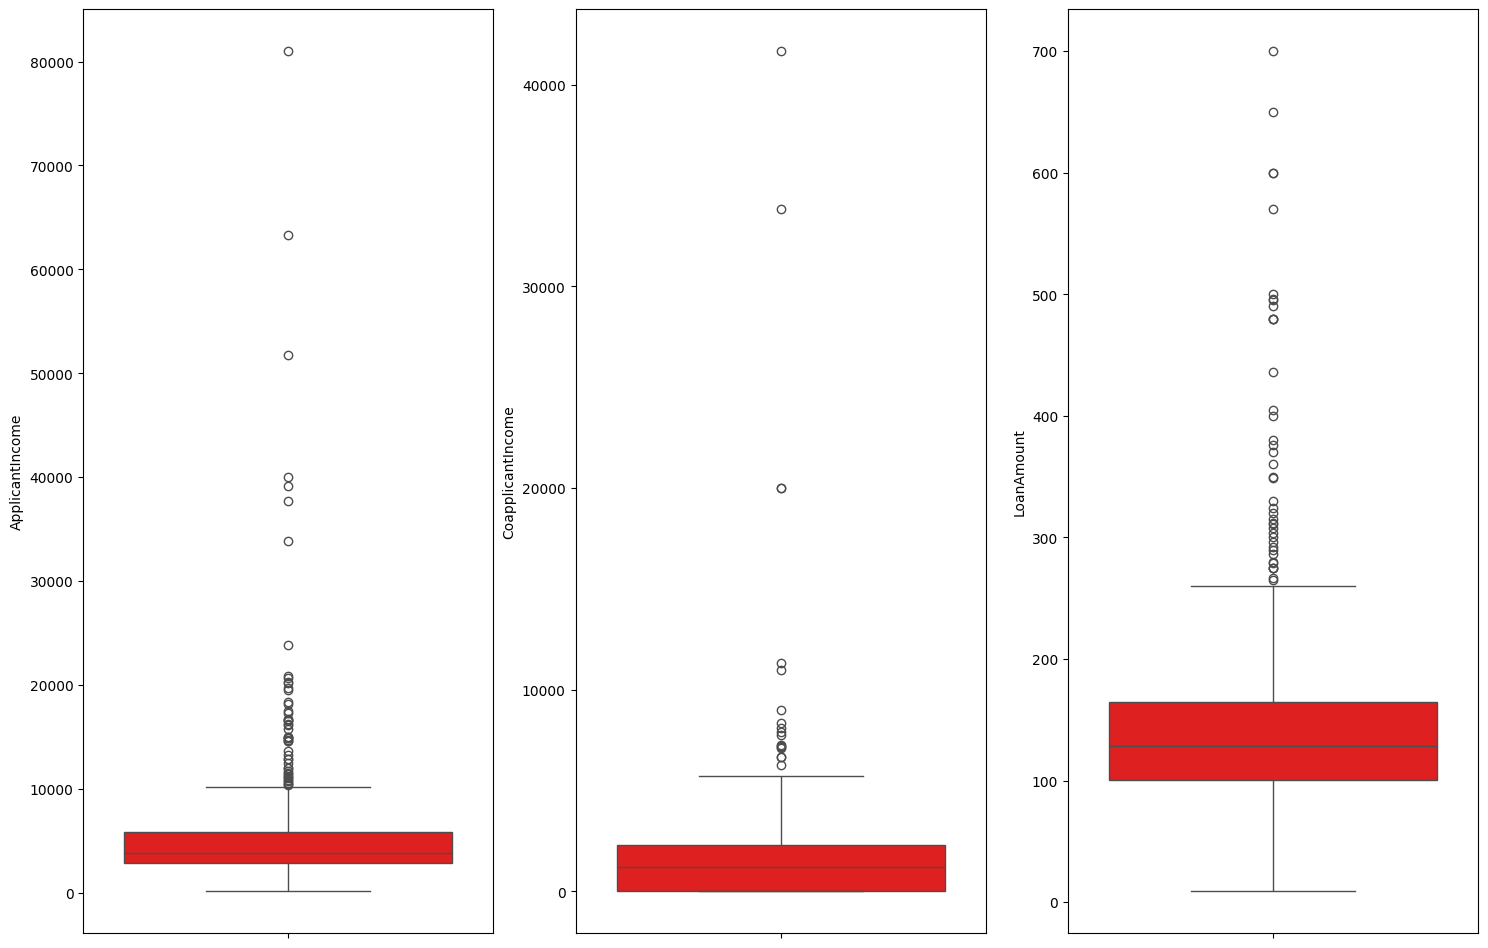

In [572]:
# Checking for outliers using boxplot

figure, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 12))
sns.boxplot(df_train[num_cols[0]], ax= axes[0], color="red")
sns.boxplot(df_train[num_cols[1]], ax = axes[1], color="red")
sns.boxplot(df_train[num_cols[2]], ax = axes[2], color="red")



In [573]:
# Looping to check the dataset for the number of outliers
# Using IQR method (numerical dataset)
outliers_cols = []
for i in num_cols:
    print(f"\n Analyzing the numerical columns - {i}")

    # Calculating the outlier boundaries using IQR
    q1 = df_train[i].quantile(0.25)
    q3 = df_train[i].quantile(0.75)
    iqr = q3 - q1

    # Defining the bounds using interquartile range
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    # Checking the outliers
    upper_outliers = (loan_train_data[i] > upper)
    lower_outliers = (loan_train_data[i] < lower)

    # Checking the number of outliers
    tot_outliers = ((upper_outliers) | (lower_outliers)).sum()

    # display the output
    print(f"The number of outliers for {i} is {tot_outliers}")


    # SHowing a sample of the outliers
    if tot_outliers > 0:
        outliers_cols.append(i)



 Analyzing the numerical columns - ApplicantIncome
The number of outliers for ApplicantIncome is 50

 Analyzing the numerical columns - CoapplicantIncome
The number of outliers for CoapplicantIncome is 18

 Analyzing the numerical columns - LoanAmount
The number of outliers for LoanAmount is 41


In [574]:
# Handling the outliers
def handling_outlier(data, i):
    q1 = loan_train_data[i].quantile(0.25)
    q3 = loan_train_data[i].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    data.loc[:, i] = np.where((data.loc[:, i] < lower) | (data.loc[:, i] > upper), data[i].clip(lower=lower, upper = upper).astype(data[i].dtype), data[i])
    return data

for i in outliers_cols:
    df_train = handling_outlier(loan_train_data, i)

df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


**Data Cleaning**

In [575]:
df_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [576]:
# Checking the values in the Dependents columns
df_train["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [577]:
# Cleaning the dataset to remove the "+" in the Dependents columns
df_train["Dependents"] = df_train["Dependents"].str.replace("+", "", regex=False)


In [578]:
# Checking the datatype of the Dependents column
df_train["Dependents"].dtypes

dtype('O')

In [579]:
# Converting the type of the Dependent column to int64
df_train["Dependents"] = df_train["Dependents"].astype('Int64')
df_train["Dependents"].dtypes

Int64Dtype()

### Phase 2: Exploratory Data Analysis (EDA)



Task 2.1: Conduct descriptive statistics to summarize the key characteristics of the data.

In [580]:
# Define a function to check the statistical summary
def univariate_numerical_eda(df, column):
    """
    Performing univariate EDA on each numerical columns.
    Display the statistical summary skewness, kurtosis, histogram, KDE and boxplot
    """
    print(f"Feature: {column}")
    print("-" * 40)
    print(df_train[column].describe().to_frame())
    print(f"Skewness: {df_train[column].skew():.3f}")
    print(f"Kurtosis: {df_train[column].kurt():.3f}")

    plt.figure(figsize=(12,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color='orange')
    plt.title(f"\n Distribution of {column}", fontsize=13)
    plt.xlabel(column)
    plt.ylabel("Frequency")

    # Box Plot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='orange')
    plt.title(f"\n Boxplot of {column}", fontsize=13)

    plt.tight_layout()
    plt.show()

    # Transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed, Consider log or Box-Cox transformation")
    elif abs(df[column].skew()) > 0.5:
        print(f"\n{column} is moderately skewed")
    else:
        print(f"{column} is fairly symmetric")


**Task 2.2: Visualize distributions of numerical features using histograms and box plots.**

Feature: ApplicantIncome
----------------------------------------
       ApplicantIncome
count       614.000000
mean       4617.091205
std        2479.806058
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       10171.000000
Skewness: 1.040
Kurtosis: 0.126


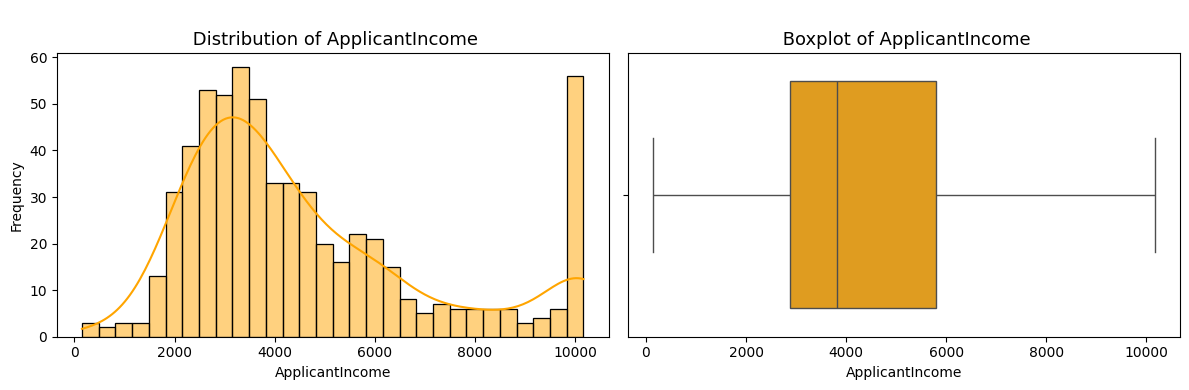


 ApplicantIncome is highly skewed, Consider log or Box-Cox transformation


In [581]:
# Histogram + boxplot for Applicant income
univariate_numerical_eda(df_train, "ApplicantIncome")

Feature: ApplicantIncome
----------------------------------------
       ApplicantIncome
count       614.000000
mean       4617.091205
std        2479.806058
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       10171.000000
Skewness: 1.040
Kurtosis: 0.126


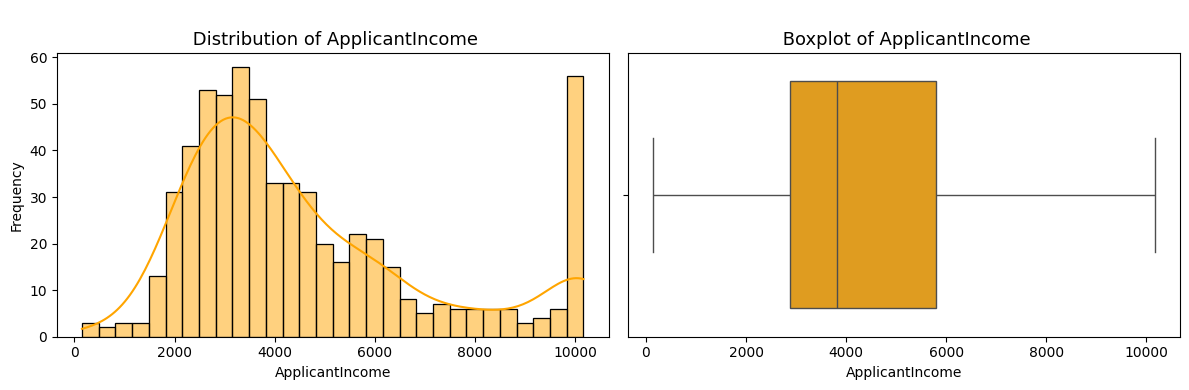


 ApplicantIncome is highly skewed, Consider log or Box-Cox transformation
Feature: CoapplicantIncome
----------------------------------------
       CoapplicantIncome
count         614.000000
mean         1419.702231
std          1624.605892
min             0.000000
25%             0.000000
50%          1188.500000
75%          2297.250000
max          5743.125000
Skewness: 1.013
Kurtosis: 0.245


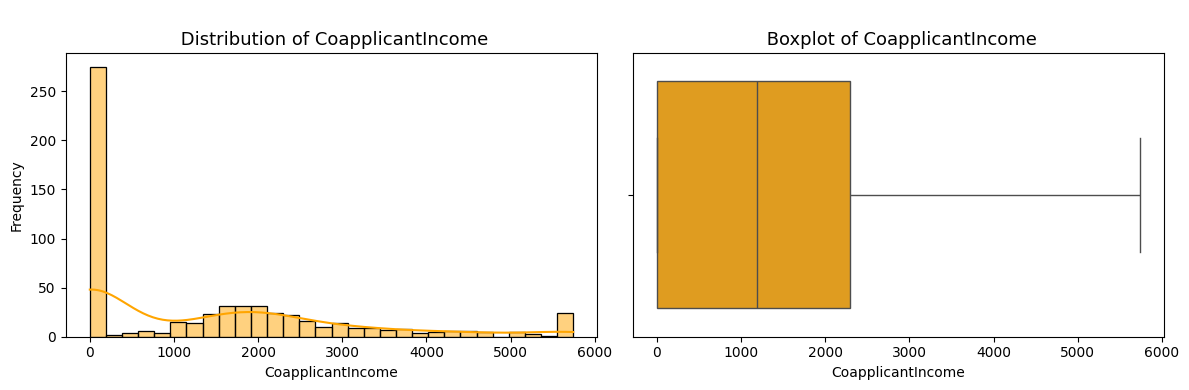


 CoapplicantIncome is highly skewed, Consider log or Box-Cox transformation
Feature: LoanAmount
----------------------------------------
       LoanAmount
count  592.000000
mean   138.288851
std     58.059973
min      9.000000
25%    100.000000
50%    128.000000
75%    168.000000
max    270.000000
Skewness: 0.727
Kurtosis: 0.134


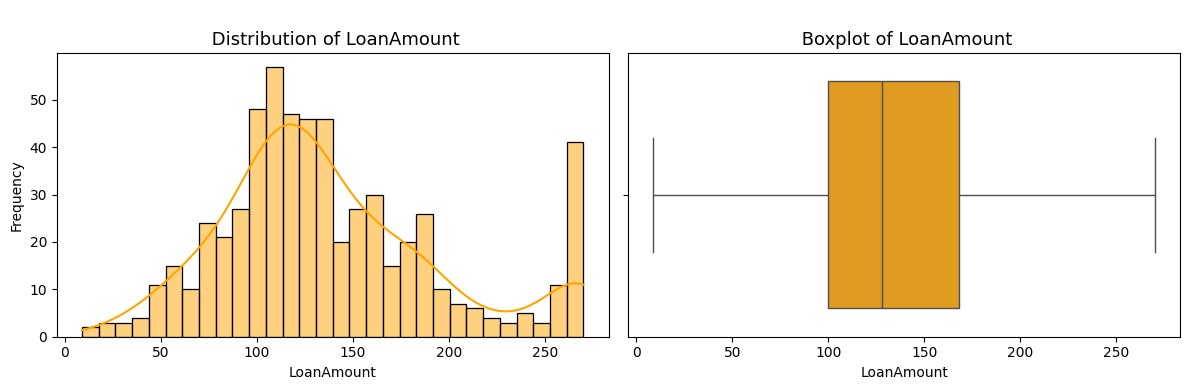


LoanAmount is moderately skewed


In [521]:
# Looping to check the summary for the other numerical dataset
for col in num_cols:
    univariate_numerical_eda(df_train, col)

In [582]:
# Converting the Loan Amount type back toInt 64
df_train["Loan_Amount_Term"] = df_train["Loan_Amount_Term"].astype(float)
df_train["Loan_Amount_Term"] 

Loan_ID
LP001002    360.0
LP001003    360.0
LP001005    360.0
LP001006    360.0
LP001008    360.0
            ...  
LP002978    360.0
LP002979    180.0
LP002983    360.0
LP002984    360.0
LP002990    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

In [583]:
# Calculating the years of the loan amount term from the months
df_train["Loan_Amount_Term_year"] = round((df_train["Loan_Amount_Term"] / 12) , 1)
df_train["Loan_Amount_Term_year"].head()

Loan_ID
LP001002    30.0
LP001003    30.0
LP001005    30.0
LP001006    30.0
LP001008    30.0
Name: Loan_Amount_Term_year, dtype: float64

In [584]:
# Extract the columns with categorical variables
cat_col = df_train.select_dtypes(include="object").columns
cat_col

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')

**Task 2.3: Analyze categorical features (e.g., education, employment status, property area) using bar charts and pie charts.**

****

In [585]:
def univariate_categorical_eda(df, column):
    """
    Performs univariate EDA on categorical columns
    Displays frequency table, proportion, bar chart and pie chart
    """

    print(f"Feature: {column}")
    print("="*40)

    # Frequency +proportion
    freq = df[column].value_counts()
    prop = df[column].value_counts(normalize=True)* 100
    summary = pd.DataFrame({"Count": freq, "Percentage": prop.round(2)})
    print(summary)
    print()

    plt.figure(figsize=(8,5))
    # Visualization (Barchart)
    plt.subplot(1,2,1)
    ax = sns.countplot(x=column, data=df_train, palette="Set3", order=freq.index, color="orange")
    plt.title(f"Distribution Barchart of {column}", fontsize=13)
    plt.xlabel(column)
    plt.ylabel("Count")

    # Visualization (piechart)
    plt.subplot(1,2,2)
    df_train[col].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)
    plt.title(f"Distribution Piechart of {column}", fontsize=13)

    # Annotate each bar with percentage
    total = len(df[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1, f"{(height/total)*100:.1f}%", ha="center")

    plt.tight_layout()
    plt.show()

Feature: Gender
        Count  Percentage
Gender                   
Male      489       81.36
Female    112       18.64



C:\Users\kanyi\AppData\Local\Temp\ipykernel_16964\3694337400.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train, palette="Set3", order=freq.index, color="orange")


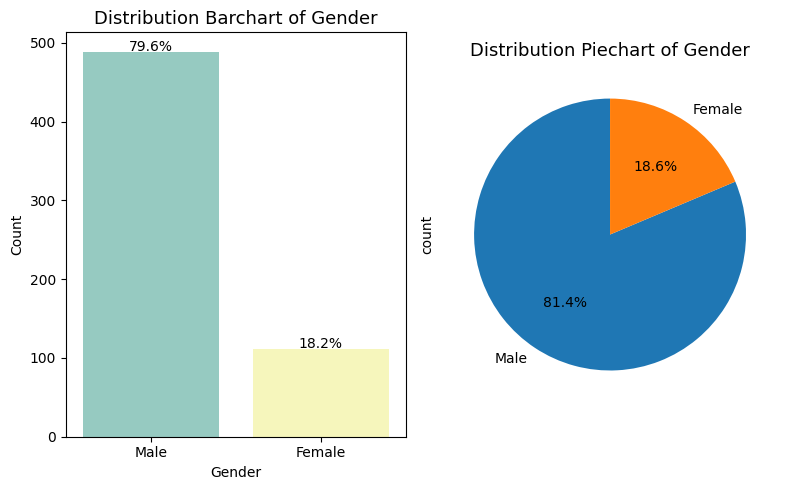

Feature: Married
         Count  Percentage
Married                   
Yes        398       65.14
No         213       34.86



C:\Users\kanyi\AppData\Local\Temp\ipykernel_16964\3694337400.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train, palette="Set3", order=freq.index, color="orange")


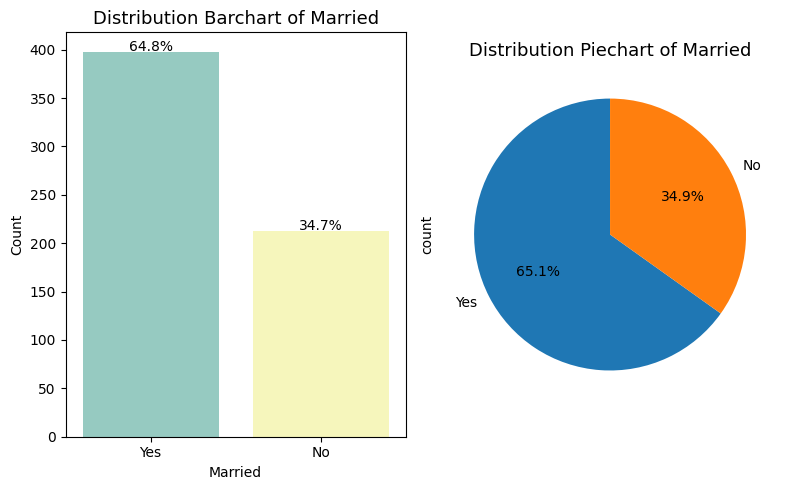

Feature: Education
              Count  Percentage
Education                      
Graduate        480       78.18
Not Graduate    134       21.82



C:\Users\kanyi\AppData\Local\Temp\ipykernel_16964\3694337400.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train, palette="Set3", order=freq.index, color="orange")


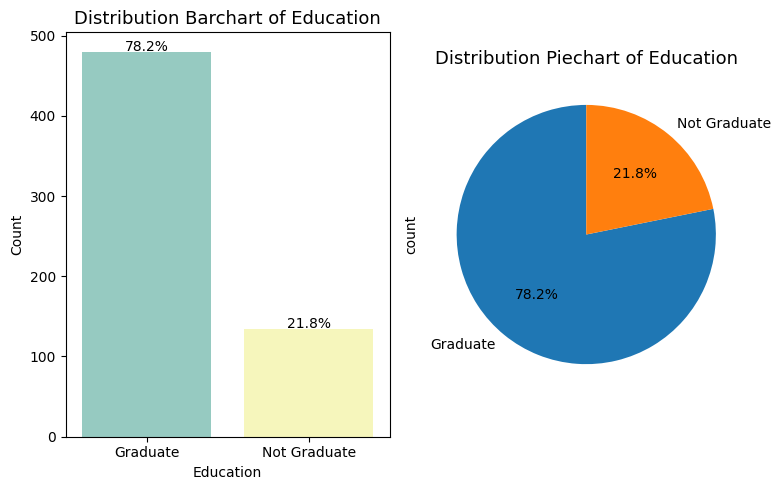

Feature: Self_Employed
               Count  Percentage
Self_Employed                   
No               500       85.91
Yes               82       14.09



C:\Users\kanyi\AppData\Local\Temp\ipykernel_16964\3694337400.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train, palette="Set3", order=freq.index, color="orange")


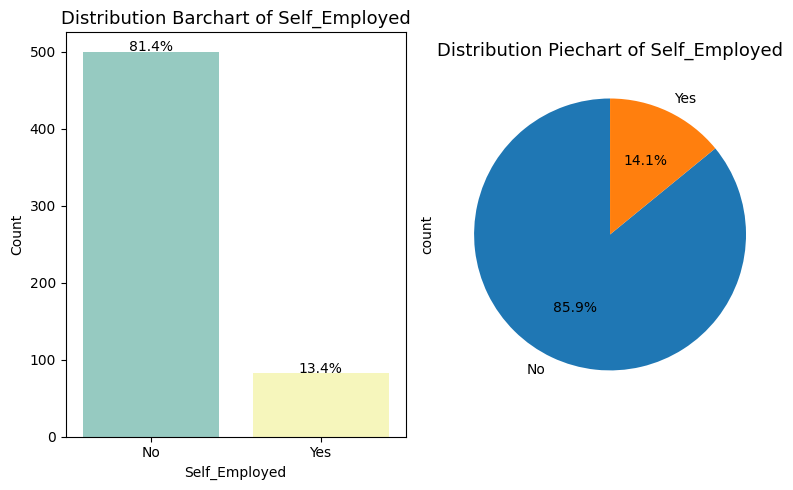

Feature: Property_Area
               Count  Percentage
Property_Area                   
Semiurban        233       37.95
Urban            202       32.90
Rural            179       29.15



C:\Users\kanyi\AppData\Local\Temp\ipykernel_16964\3694337400.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train, palette="Set3", order=freq.index, color="orange")


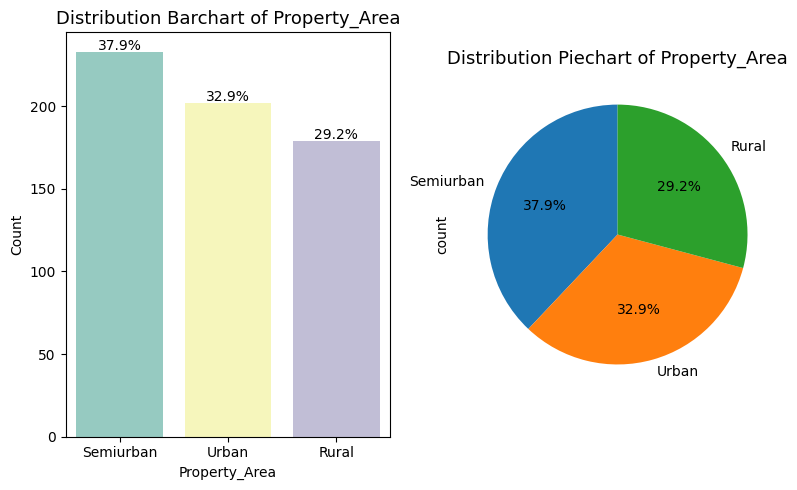

Feature: Loan_Status
             Count  Percentage
Loan_Status                   
Y              422       68.73
N              192       31.27



C:\Users\kanyi\AppData\Local\Temp\ipykernel_16964\3694337400.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train, palette="Set3", order=freq.index, color="orange")


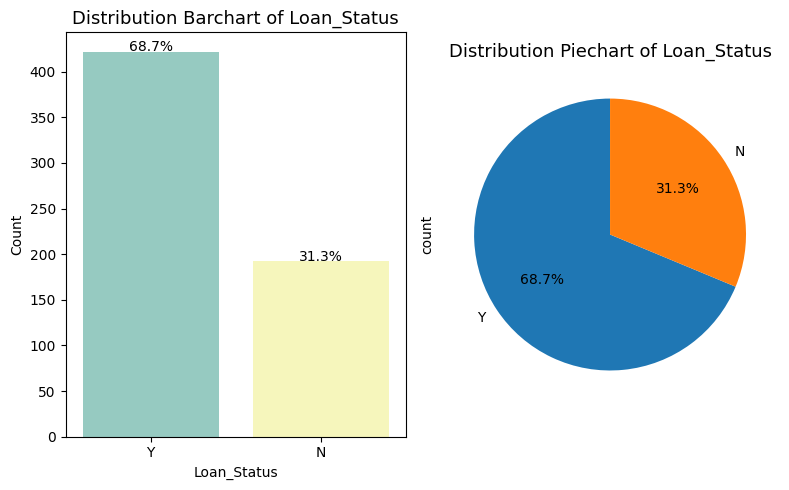

In [586]:
for col in cat_col:
    univariate_categorical_eda(df_train, col)

### Bivariate Analysis

**Task 2.4: Examine relationships between features and the target variable (loan approval status) using scatter plots, correlation matrices, and cross-tabulations.**

In [587]:
# Check the data types of the columns
df_train.dtypes

Gender                    object
Married                   object
Dependents                 Int64
Education                 object
Self_Employed             object
ApplicantIncome            int64
CoapplicantIncome        float64
LoanAmount               float64
Loan_Amount_Term         float64
Credit_History           float64
Property_Area             object
Loan_Status               object
Loan_Amount_Term_year    float64
dtype: object

In [588]:
df_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term_year
Loan_ID,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,30.0
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,30.0


In [589]:
# Convert the loan status to numeric
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y': 1, 'N':0})


In [590]:
# 
df_train['Loan_Status']

Loan_ID
LP001002    1
LP001003    0
LP001005    1
LP001006    1
LP001008    1
           ..
LP002978    1
LP002979    1
LP002983    1
LP002984    1
LP002990    0
Name: Loan_Status, Length: 614, dtype: int64

In [591]:
df_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term_year
Loan_ID,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,30.0
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,30.0


In [532]:
# # Lets find the numerical features
# num_features = loan_train_data.select_dtypes(include=['Int64', 'Float64']).columns

# # Convert to dataframe
# num_features = pd.DataFrame(loan_train_data[num_features])
# num_features.head(2)

In [593]:
df_train.isna().sum()

Gender                   13
Married                   3
Dependents               15
Education                 0
Self_Employed            32
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount               22
Loan_Amount_Term         14
Credit_History           50
Property_Area             0
Loan_Status               0
Loan_Amount_Term_year    14
dtype: int64

**Correlation with target**

In [594]:
def correlation_with_target(df_train, target_col, figsize=(8,5)):
    """
    Plots a heatmap showing the correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude)
    """

    # Compute correlations of every numeric column with the target
    corrs = df_train[num_cols].corrwith(df_train['Loan_Status'])

    corrs_df = corrs.to_frame(name='corr').T  # shape(1,n)

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center = 0,
        vmin = -1,
        vmax = 1,
        cbar_kws = {"orientation": "vertical", "shrink": 0.7}
    )

    plt.xticks(rotation=0, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f"Correlation of numeric features with {target_col}", fontsize=12)
    plt.tight_layout()
    plt.show()

    # Return sorted correlation for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)

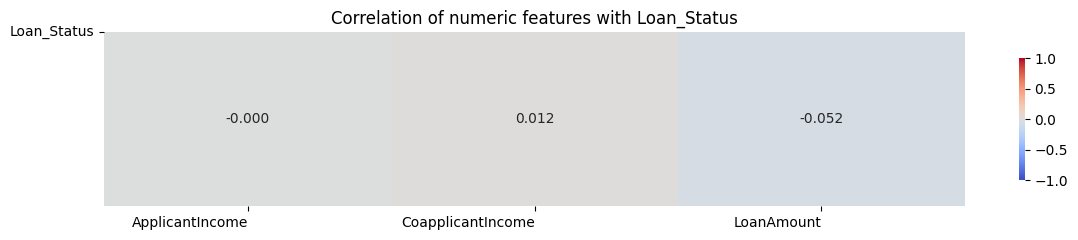

LoanAmount          -0.051618
CoapplicantIncome    0.011983
ApplicantIncome     -0.000442
dtype: float64

In [535]:
corr_series = correlation_with_target(df_train, 'Loan_Status', figsize=(12, 2.5))
(corr_series)

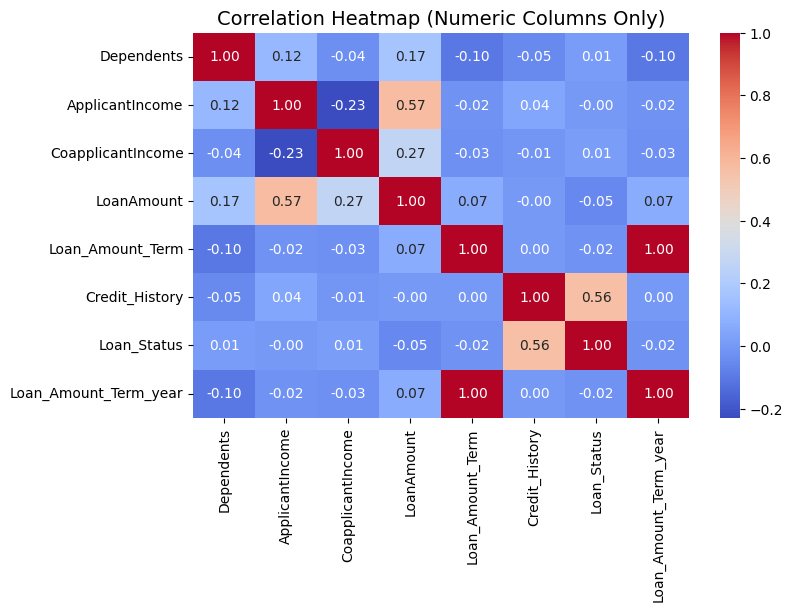

In [598]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df_train.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Columns Only)', fontsize=14)
plt.show()